# **MAS473 Programming Recitation (Week 5)**

## **Contents**

We will cover

- **Linear Regression**
- **Learning Curve**
- **Overfitting and Regularization**
- **Polynomial Models**

## **1. Linear Regression using a Normal Equation**
As an easy exercise, we will implement a linear regression from a synthetic data which generated from $y=2x+3+\epsilon$ where $\epsilon\sim\mathcal{N}(0, 0.5^2)$.

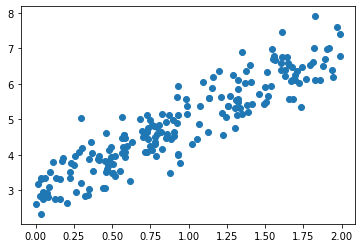

In [ ]:
import numpy as np 
# generate data points
X = 2 * np.random.rand(200, 1)
Y = 3 + 2 * X + 0.5 * np.random.randn(200, 1)
# visualization
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

Consider a linear model 

<center>$y = \theta_0 + \theta_1 x + \epsilon$</center>

where $\epsilon\sim \mathcal{N}(0, \sigma^2)$

From the normal equation, we obtain the maximum likelihood estimator of the weights and the bias.

In [ ]:
X_b = np.c_[np.ones((200,1)), X] # set x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [ ]:
print(theta_best)

[[2.96262457]
 [2.02907456]]


## **2. Linear Regression using Scikit-learn**

Scikit learn offer many models for supervised learning such as regression
and classification, and they all follow the same application programming
interface as follow.

In [ ]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

lin_reg = lm.LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using matplotlib.pyplot, we can visualize our predicted results.

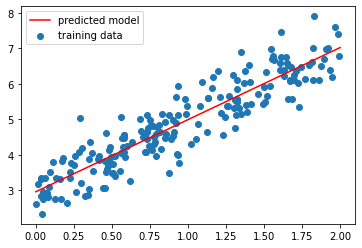

MSE : 0.241861


In [ ]:
domain = np.linspace(0, 2, 500)[:,None]
lin_predict = lin_reg.predict(domain)

plt.plot(domain, lin_predict, label = "predicted model", color = "red")
plt.scatter(X, Y, label = "training data")
plt.legend()
plt.show()

lin_pred = lin_reg.predict(X)
lin_pred_MSE = mean_squared_error(lin_pred, Y)
print('MSE : {:.6f}'.format(lin_pred_MSE))

We can find the coefficients and intercept of our predicted model.

In [ ]:
print(lin_reg.intercept_, lin_reg.coef_)

[2.96262457] [[2.02907456]]


## **3. Learning Curve**

To check whether a model is overfitted or not, a **learning curve** is usually
used. It is a graph of a training error and validation error with respect to a
size of training set. Once a size of training set is selected, validation set
will be randomly chosen in training set.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-', label = 'training error')
    plt.plot(np.sqrt(val_errors), 'b-', label = 'validation error')
    plt.xlabel('size of training data')
    plt.ylabel('RMSE')
    plt.legend()

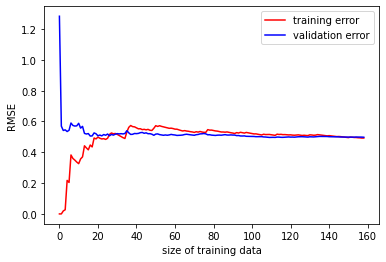

In [ ]:
plot_learning_curves(lin_reg, X,Y.ravel())

However, in many cases (especially, in deep learning) a learning curve means training curve for number of training iterations. Do not confuse!

## **4. Overfitting and Regularization**

When a training error is much lower than validation and there is a wide gap between training error and validation error, there may be an overfitting.
To reduce an overfitting, we usually use regularization, by adding $\ell1$ (Lasso) or $\ell2$ (Ridge) norm of training data in the objective function.

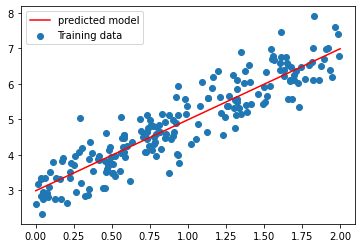

MSE = 0.24217909363978493


In [ ]:
#from sklearn.linear_model import Ridge
lin_ridge_reg = lm.Ridge()
lin_ridge_reg.fit(X,Y)
domain = np.linspace(0,2,500)[:,None]
lin_ridge_predict = lin_ridge_reg.predict(domain)
plt.plot(domain,lin_ridge_predict, label = 'predicted model', color = 'red')
plt.scatter(X,Y, label = 'Training data')
plt.legend()
plt.show()
lin_ridge_pred = lin_ridge_reg.predict(X)
print("MSE =", mean_squared_error(Y,lin_ridge_pred)) # It is the squared sum error of our predicted model and training data.

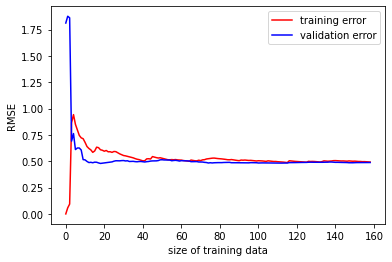

In [ ]:
plot_learning_curves(lin_ridge_reg, X,Y.ravel())

## **5. Polynomial Models**

Now, suppose our training data seems to be generated by a non linear model. In this case, the most fundamental method, polynomial regression is usually used. First, generate training data whichcomes from non-linear model and check the generated sample.

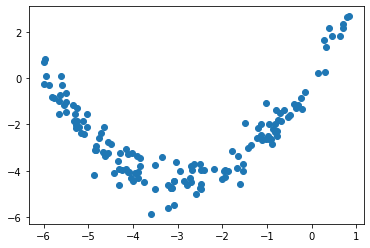

In [ ]:
X = 7*np.random.rand(150, 1) - 6
Y = 0.5*X**2 +3*X+ 0.5*np.random.randn(150, 1)
plt.scatter(X, Y)
plt.show()

In this time, we use a polynomial regression with degree 2. It just makes a predict model as a form of $y = a_0x^2 + a_1x +a_2$.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
upto_square_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = upto_square_features.fit_transform(X)
print(X_poly[11], X[11])

[-4.31782616 18.64362276] [-4.31782616]


[0.03971854]
[[3.03437651 0.50996106]]


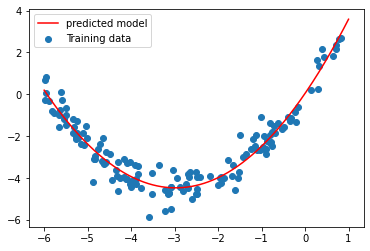

In [ ]:
poly_lin_reg = lm.LinearRegression()
poly_lin_reg.fit(X_poly,Y)
print(poly_lin_reg.intercept_)
print(poly_lin_reg.coef_) # two coefficients in a polynomial model.
xxx = np.linspace(-6,1,500)
xxx1 = upto_square_features.fit_transform(xxx[:,None])
poly_lin_reg_predict = poly_lin_reg.predict(xxx1)
plt.plot(xxx,poly_lin_reg_predict, color = 'red', label = 'predicted model')
plt.scatter(X,Y, label = 'Training data')
plt.legend()
plt.show()

## **6. Example : Predicting Boston house price using linear regression**

We are ready to deal with a real data. Here, we will use the Boston
house-prices dataset, which is described in scikit-learn. There is a
descriptions about boston housing data in a key ’DESCR’.

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

There are many features which have an effect to housing price.
Here, we will predict a median value (stored in 'target') using a training data using one feature 'AGE'.
Since it has many features, it is convinent to use a library pandas which makes our tuple data become a data frame.
To check a form of data frame, print 5 elements in a data frame.
For convinence, add our target data on dataframe as follow.

In [ ]:
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['Price'] = boston.target
print(data[0:5]) # To check a form of our data frame, print 5 elements first.

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


Now, check a relation between 'CRIM' and our target 'Price' by scattering.

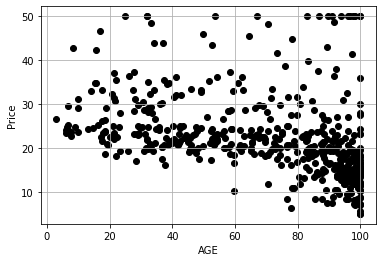

In [ ]:
plt.scatter(data['AGE'], data['Price'], color = 'black')
plt.xlabel('AGE')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Now, make a base line linear regression model. To evaluate a performance of regression, plot our result and compute the MSE.

coefficient: [-0.12316272]
Intercept: 30.97867776261804


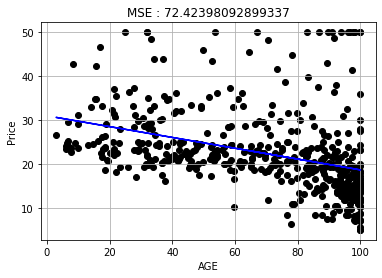

In [ ]:
X = np.array(data['AGE'])
Y = np.array(data['Price'])
price_rm = lm.LinearRegression()
price_rm.fit(X[:,None],Y)
predicted_price_rm = price_rm.predict(X[:,None])
print('coefficient:', price_rm.coef_)
print('Intercept:', price_rm.intercept_)
plt.scatter(data['AGE'], data['Price'], color = 'black')
plt.plot(data['AGE'], predicted_price_rm, color = 'b')
plt.xlabel('AGE')
plt.ylabel('Price')
plt.grid(True)
plt.title('MSE : ' + str(mean_squared_error(predicted_price_rm, Y)))
plt.show()

### **References**
#### [1] A. Geron. Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow (2nd), O' Reilly (2019).
(번역본 : 핸즈온 머신러닝 2판)
